In [1]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
 

from matplotlib import pyplot as plt

#### Cargamis los datos

In [2]:
data = pd.read_csv("practica1_redesSeq.csv")

In [3]:
data.head()

,x1,x2,x3,y
0,-1.749765,1.342680,1.653036,1.0
1,-0.252436,1.981321,1.014219,1.0
2,0.221180,-0.070043,0.310504,0.0
3,0.255001,0.541973,0.935163,1.0
4,-0.583595,1.816847,1.172721,1.0


In [4]:
data.describe()

,x1,x2,x3,y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.013503,1.019268,0.533061,0.466000
std,1.032161,0.999535,1.019132,0.499092
min,-2.973315,-2.209955,-2.519478,0.000000
25%,-0.674494,0.327711,-0.162202,0.000000
50%,0.029750,1.012551,0.488647,0.000000
75%,0.669901,1.688176,1.193795,1.000000
max,3.695300,3.929661,4.357940,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE8C114550>,
      dtype=object)

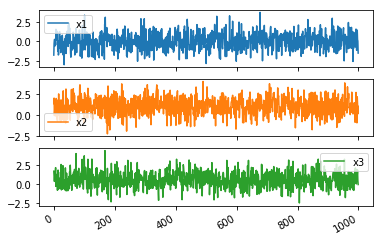

In [5]:
data.iloc[:,0:3].plot(subplots=True)

## Construimos nuestro algoritmo para entrenar la red

#### Definimos las funciones de activación y sus derivadas

In [6]:
def Fsigmoid(x, derivada=False):
    if derivada:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))


def Ftanh(x, derivada=False):
    if derivada:
        return 1 - (np.tanh(x))**2
    return np.tanh(x)

In [7]:
X = data.iloc[:,0:3].values
y = data.iloc[:,3].values


#### Escalamos para que la red no tenga problemas de convergencia

In [8]:
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)

In [9]:
y = y.reshape(len(y),1)

#### Entrenamos

##### Consideraciones
* Hacemos el algoritmo totalmente matricial es decir:
    **Y = A·X + C = Â·(X|1)**
* Por otro lado en lugar de usar la formulación de clase y de los desarrollos, por comodidad (y costumbre) prefiero tener las observaciones como filas y las _feautures_ como columnas
* Al considerarse un ejercicio de implementación básica del algoritmo no he considerado la separación de muestras: entrenamiento, validación y test
* De lo anterior se presupone la existencia de _overfitting_


In [10]:
v0=np.c_[X_sc,np.ones((X_sc.shape[0],1))] #se añade vector de "1" por el bias
#Hiperparámetros
nu = 3
epocas = 15000

# Inicializamos las matrces de pesos
w1 = np.random.random((len(v0[0]), 3))
w2 = np.random.random((4, 1))


for epoca in range(epocas):
    
    
    #Feedforward:
    u1 = v0 @ w1
    v1 = Ftanh(u1, derivada=False)
    
    v1=np.c_[v1, np.ones((v1.shape[0],1))] #se añade vector de "1" por el bias
    u2 = v1 @ w2
    v2 = Fsigmoid(u2, derivada=False)

   
    #Backpropagation:
    
    #Capa de Salida:
        
    d_v2_er = (v2 - y)/v0.shape[0] #dividimos entre el batch, en este caso todas las observaciones
    d_w2 = v1
    d_2 =- d_w2.T @ d_v2_er 
    

    #Capa oculta:
    
    d_v1 = d_v2_er  @ w2[0:3,:].T #se elimina el bias
    d_u1 = Ftanh(u1[:,0:3],derivada=True)
    d_w1 = v0
    d_1  = -d_w1.T @ (d_v1 * d_u1)
    
    
    # Actualizamos los pesos:
    w1 = w1 + nu * d_1
    w2 = w2 + nu * d_2
    
    
    #imprimimos época y error:
    print("numero de época: ", epoca+1, " error:  ", np.linalg.norm(d_v2_er, ord=2, axis=None, keepdims=False)  )

numero de época:  1  error:   0.015263690941660987
numero de época:  2  error:   0.012783234479041183
numero de época:  3  error:   0.01028825422179175
numero de época:  4  error:   0.008449556156441844
numero de época:  5  error:   0.007527033645915075
numero de época:  6  error:   0.007003400632665659
numero de época:  7  error:   0.006691400355988774
numero de época:  8  error:   0.006495808898447474
numero de época:  9  error:   0.006368011051617468
numero de época:  10  error:   0.006281572082442483
numero de época:  11  error:   0.006221472617640747
numero de época:  12  error:   0.006178743818879477
numero de época:  13  error:   0.006147815723226308
numero de época:  14  error:   0.006125106952735433
numero de época:  15  error:   0.006108243397489231
numero de época:  16  error:   0.006095611203969926
numero de época:  17  error:   0.00608608776282003
numero de época:  18  error:   0.006078877237070231
numero de época:  19  error:   0.006073405527006647
numero de época:  20  e

numero de época:  186  error:   0.006012045804951355
numero de época:  187  error:   0.0060116157760796134
numero de época:  188  error:   0.006011184050128716
numero de época:  189  error:   0.006010750778348715
numero de época:  190  error:   0.006010316116300517
numero de época:  191  error:   0.0060098802232313045
numero de época:  192  error:   0.006009443261421713
numero de época:  193  error:   0.00600900539552546
numero de época:  194  error:   0.0060085667918882415
numero de época:  195  error:   0.006008127617875645
numero de época:  196  error:   0.006007688041185819
numero de época:  197  error:   0.006007248229190869
numero de época:  198  error:   0.006006808348264241
numero de época:  199  error:   0.00600636856316097
numero de época:  200  error:   0.006005929036377619
numero de época:  201  error:   0.006005489927596408
numero de época:  202  error:   0.006005051393090255
numero de época:  203  error:   0.006004613585255707
numero de época:  204  error:   0.00600417665

numero de época:  355  error:   0.005960172886985493
numero de época:  356  error:   0.005959998717918562
numero de época:  357  error:   0.005959840432014345
numero de época:  358  error:   0.0059596686573873455
numero de época:  359  error:   0.005959511637582883
numero de época:  360  error:   0.005959342120369713
numero de época:  361  error:   0.005959186400902258
numero de época:  362  error:   0.005959019023106324
numero de época:  363  error:   0.005958864630420442
numero de época:  364  error:   0.005958699289651192
numero de época:  365  error:   0.005958546244106372
numero de época:  366  error:   0.005958382850813071
numero de época:  367  error:   0.005958231167993007
numero de época:  368  error:   0.00595806964321405
numero de época:  369  error:   0.005957919334934995
numero de época:  370  error:   0.005957759608454812
numero de época:  371  error:   0.005957610683546141
numero de época:  372  error:   0.005957452692376807
numero de época:  373  error:   0.005957305157

numero de época:  551  error:   0.005945605358096845
numero de época:  552  error:   0.005947670724790888
numero de época:  553  error:   0.00594422572983939
numero de época:  554  error:   0.005946296758653338
numero de época:  555  error:   0.005943080063027823
numero de época:  556  error:   0.005945132990811267
numero de época:  557  error:   0.005942122410589463
numero de época:  558  error:   0.005944140662825242
numero de época:  559  error:   0.005941316082176032
numero de época:  560  error:   0.0059432884742502195
numero de época:  561  error:   0.005940631794962013
numero de época:  562  error:   0.005942551154058731
numero de época:  563  error:   0.005940046164449183
numero de época:  564  error:   0.005941908282476049
numero de época:  565  error:   0.0059395404907409115
numero de época:  566  error:   0.005941343333322262
numero de época:  567  error:   0.005939099791276973
numero de época:  568  error:   0.005940842902685027
numero de época:  569  error:   0.00593871203

numero de época:  762  error:   0.0059627036826732606
numero de época:  763  error:   0.0059486162022959355
numero de época:  764  error:   0.0059609951795420455
numero de época:  765  error:   0.005947029672280523
numero de época:  766  error:   0.005959141169181604
numero de época:  767  error:   0.005945358175142716
numero de época:  768  error:   0.005957202003784962
numero de época:  769  error:   0.005943654388306538
numero de época:  770  error:   0.005955230364200276
numero de época:  771  error:   0.005941962170478882
numero de época:  772  error:   0.005953269939078257
numero de época:  773  error:   0.005940315940645705
numero de época:  774  error:   0.005951355163507858
numero de época:  775  error:   0.005938741006900981
numero de época:  776  error:   0.0059495117214690045
numero de época:  777  error:   0.005937254511055228
numero de época:  778  error:   0.0059477575222575815
numero de época:  779  error:   0.005935866694212923
numero de época:  780  error:   0.0059461

numero de época:  982  error:   0.0059310999867165206
numero de época:  983  error:   0.00591885515611015
numero de época:  984  error:   0.005931136155357106
numero de época:  985  error:   0.005918829571023544
numero de época:  986  error:   0.0059312117674562405
numero de época:  987  error:   0.005918828673747747
numero de época:  988  error:   0.005931326697076062
numero de época:  989  error:   0.00591885265156094
numero de época:  990  error:   0.005931480808937297
numero de época:  991  error:   0.005918901735102789
numero de época:  992  error:   0.005931673923676821
numero de época:  993  error:   0.005918976169589382
numero de época:  994  error:   0.005931905777570702
numero de época:  995  error:   0.005919076181098506
numero de época:  996  error:   0.00593217597669829
numero de época:  997  error:   0.005919201937637874
numero de época:  998  error:   0.00593248394569826
numero de época:  999  error:   0.005919353504854308
numero de época:  1000  error:   0.0059328288715

numero de época:  1190  error:   0.00593552268045799
numero de época:  1191  error:   0.0059170390231604595
numero de época:  1192  error:   0.005935234921595754
numero de época:  1193  error:   0.00591679499617652
numero de época:  1194  error:   0.0059349416246475455
numero de época:  1195  error:   0.0059165483134439485
numero de época:  1196  error:   0.005934646065761825
numero de época:  1197  error:   0.005916301279824298
numero de época:  1198  error:   0.005934351371452924
numero de época:  1199  error:   0.005916056062610782
numero de época:  1200  error:   0.005934060487124628
numero de época:  1201  error:   0.005915814672690607
numero de época:  1202  error:   0.005933776153302183
numero de época:  1203  error:   0.005915578951981687
numero de época:  1204  error:   0.005933500888923001
numero de época:  1205  error:   0.005915350566406324
numero de época:  1206  error:   0.005933236980856593
numero de época:  1207  error:   0.005915131003552475
numero de época:  1208  err

numero de época:  1395  error:   0.005910588491921366
numero de época:  1396  error:   0.005931208594852135
numero de época:  1397  error:   0.005910539504491593
numero de época:  1398  error:   0.005931174407400026
numero de época:  1399  error:   0.005910482957273046
numero de época:  1400  error:   0.005931129820032651
numero de época:  1401  error:   0.005910419030649331
numero de época:  1402  error:   0.00593107518999254
numero de época:  1403  error:   0.005910348012346584
numero de época:  1404  error:   0.005931011013452999
numero de época:  1405  error:   0.005910270290106201
numero de época:  1406  error:   0.005930937914211762
numero de época:  1407  error:   0.005910186342663392
numero de época:  1408  error:   0.005930856630430856
numero de época:  1409  error:   0.005910096729317485
numero de época:  1410  error:   0.005930767999796771
numero de época:  1411  error:   0.005910002078407492
numero de época:  1412  error:   0.005930672943497906
numero de época:  1413  error

numero de época:  1615  error:   0.005904488003254229
numero de época:  1616  error:   0.005926766971610858
numero de época:  1617  error:   0.005904430652587353
numero de época:  1618  error:   0.0059267185554257905
numero de época:  1619  error:   0.005904371621441578
numero de época:  1620  error:   0.005926667994084231
numero de época:  1621  error:   0.00590431112147311
numero de época:  1622  error:   0.005926615593855041
numero de época:  1623  error:   0.005904249383231979
numero de época:  1624  error:   0.005926561682587081
numero de época:  1625  error:   0.0059041866520028055
numero de época:  1626  error:   0.005926506603980669
numero de época:  1627  error:   0.005904123183527225
numero de época:  1628  error:   0.005926450711767314
numero de época:  1629  error:   0.005904059239686605
numero de época:  1630  error:   0.005926394363898915
numero de época:  1631  error:   0.005903995084220052
numero de época:  1632  error:   0.005926337916842196
numero de época:  1633  err

numero de época:  1850  error:   0.005922683283125792
numero de época:  1851  error:   0.005899038448467481
numero de época:  1852  error:   0.005922650942117398
numero de época:  1853  error:   0.005898996622593806
numero de época:  1854  error:   0.005922619367696855
numero de época:  1855  error:   0.005898955405048929
numero de época:  1856  error:   0.005922588538073135
numero de época:  1857  error:   0.005898914776681739
numero de época:  1858  error:   0.005922558419484539
numero de época:  1859  error:   0.0058988747094593135
numero de época:  1860  error:   0.005922528967052977
numero de época:  1861  error:   0.005898835167144589
numero de época:  1862  error:   0.005922500125809667
numero de época:  1863  error:   0.00589879610609964
numero de época:  1864  error:   0.005922471831871622
numero de época:  1865  error:   0.005898757476198816
numero de época:  1866  error:   0.005922444013746148
numero de época:  1867  error:   0.005898719221834424
numero de época:  1868  erro

numero de época:  2074  error:   0.00591930177883504
numero de época:  2075  error:   0.005894697047329156
numero de época:  2076  error:   0.005919273124776408
numero de época:  2077  error:   0.0058946608556401225
numero de época:  2078  error:   0.005919244333432799
numero de época:  2079  error:   0.005894624577084591
numero de época:  2080  error:   0.005919215396450421
numero de época:  2081  error:   0.00589458820587266
numero de época:  2082  error:   0.005919186308832995
numero de época:  2083  error:   0.0058945517388226745
numero de época:  2084  error:   0.005919157068953492
numero de época:  2085  error:   0.005894515175356498
numero de época:  2086  error:   0.005919127678501281
numero de época:  2087  error:   0.005894478517445127
numero de época:  2088  error:   0.005919098142367202
numero de época:  2089  error:   0.005894441769506885
numero de época:  2090  error:   0.0059190684684702075
numero de época:  2091  error:   0.005894404938261163
numero de época:  2092  err

numero de época:  2303  error:   0.005890713055157136
numero de época:  2304  error:   0.005916029069220716
numero de época:  2305  error:   0.005890679837916368
numero de época:  2306  error:   0.005916001677355887
numero de época:  2307  error:   0.005890646677848219
numero de época:  2308  error:   0.005915974340748994
numero de época:  2309  error:   0.005890613574610636
numero de época:  2310  error:   0.005915947058505981
numero de época:  2311  error:   0.005890580527253664
numero de época:  2312  error:   0.005915919828991404
numero de época:  2313  error:   0.005890547534253127
numero de época:  2314  error:   0.005915892649880972
numero de época:  2315  error:   0.005890514593555232
numero de época:  2316  error:   0.005915865518226836
numero de época:  2317  error:   0.005890481702630871
numero de época:  2318  error:   0.005915838430533973
numero de época:  2319  error:   0.005890448858538293
numero de época:  2320  error:   0.005915811382845814
numero de época:  2321  erro

numero de época:  2526  error:   0.0059130945111136035
numero de época:  2527  error:   0.0058871509683374275
numero de época:  2528  error:   0.005913068895302433
numero de época:  2529  error:   0.005887120355908851
numero de época:  2530  error:   0.0059130432866988025
numero de época:  2531  error:   0.005887089757056307
numero de época:  2532  error:   0.0059130176859606915
numero de época:  2533  error:   0.005887059172300035
numero de época:  2534  error:   0.005912992093868139
numero de época:  2535  error:   0.005887028602253239
numero de época:  2536  error:   0.005912966511302459
numero de época:  2537  error:   0.00588699804760499
numero de época:  2538  error:   0.005912940939223867
numero de época:  2539  error:   0.005886967509101938
numero de época:  2540  error:   0.005912915378647974
numero de época:  2541  error:   0.005886936987529287
numero de época:  2542  error:   0.005912889830621754
numero de época:  2543  error:   0.005886906483691452
numero de época:  2544  e

numero de época:  2744  error:   0.0059103837862246765
numero de época:  2745  error:   0.0058839169295813445
numero de época:  2746  error:   0.005910359635422276
numero de época:  2747  error:   0.005883888117872845
numero de época:  2748  error:   0.005910335497551739
numero de época:  2749  error:   0.005883859320535131
numero de época:  2750  error:   0.005910311372369476
numero de época:  2751  error:   0.0058838305373428886
numero de época:  2752  error:   0.00591028725962386
numero de época:  2753  error:   0.005883801768065841
numero de época:  2754  error:   0.005910263159060656
numero de época:  2755  error:   0.005883773012473158
numero de época:  2756  error:   0.005910239070428381
numero de época:  2757  error:   0.005883744270337734
numero de época:  2758  error:   0.0059102149934834175
numero de época:  2759  error:   0.005883715541440274
numero de época:  2760  error:   0.0059101909279948356
numero de época:  2761  error:   0.0058836868255730855
numero de época:  2762 

numero de época:  2956  error:   0.005907886243319178
numero de época:  2957  error:   0.005880931172801322
numero de época:  2958  error:   0.00590786324944918
numero de época:  2959  error:   0.0058809035997122
numero de época:  2960  error:   0.005907840265493747
numero de época:  2961  error:   0.005880876036602173
numero de época:  2962  error:   0.005907817291483215
numero de época:  2963  error:   0.005880848483482709
numero de época:  2964  error:   0.005907794327446726
numero de época:  2965  error:   0.0058808209403641
numero de época:  2966  error:   0.005907771373411146
numero de época:  2967  error:   0.0058807934072546185
numero de época:  2968  error:   0.005907748429400101
numero de época:  2969  error:   0.005880765884159735
numero de época:  2970  error:   0.005907725495433092
numero de época:  2971  error:   0.005880738371081445
numero de época:  2972  error:   0.00590770257152474
numero de época:  2973  error:   0.005880710868017685
numero de época:  2974  error:   

numero de época:  3178  error:   0.005905391118874836
numero de época:  3179  error:   0.00587792637186682
numero de época:  3180  error:   0.0059053691285041775
numero de época:  3181  error:   0.005877899767435703
numero de época:  3182  error:   0.005905347146201565
numero de época:  3183  error:   0.005877873170586473
numero de época:  3184  error:   0.005905325171950335
numero de época:  3185  error:   0.005877846581302751
numero de época:  3186  error:   0.00590530320573519
numero de época:  3187  error:   0.005877819999569341
numero de época:  3188  error:   0.005905281247542166
numero de época:  3189  error:   0.005877793425372206
numero de época:  3190  error:   0.005905259297358577
numero de época:  3191  error:   0.005877766858698407
numero de época:  3192  error:   0.005905237355172936
numero de época:  3193  error:   0.005877740299536027
numero de época:  3194  error:   0.005905215420974838
numero de época:  3195  error:   0.0058777137478740835
numero de época:  3196  erro

numero de época:  3384  error:   0.00590316633274916
numero de época:  3385  error:   0.005875223938428327
numero de época:  3386  error:   0.005903145109137006
numero de época:  3387  error:   0.00587519805815653
numero de época:  3388  error:   0.00590312389238254
numero de época:  3389  error:   0.005875172184502143
numero de época:  3390  error:   0.005903102682476021
numero de época:  3391  error:   0.005875146317460309
numero de época:  3392  error:   0.005903081479407527
numero de época:  3393  error:   0.005875120457026061
numero de época:  3394  error:   0.0059030602831669455
numero de época:  3395  error:   0.005875094603194337
numero de época:  3396  error:   0.005903039093744013
numero de época:  3397  error:   0.00587506875596
numero de época:  3398  error:   0.0059030179111283256
numero de época:  3399  error:   0.005875042915317853
numero de época:  3400  error:   0.005902996735309373
numero de época:  3401  error:   0.005875017081262671
numero de época:  3402  error:   

numero de época:  3594  error:   0.005900973682701357
numero de época:  3595  error:   0.005872542117205701
numero de época:  3596  error:   0.005900953135281314
numero de época:  3597  error:   0.005872516920883527
numero de época:  3598  error:   0.005900932593985209
numero de época:  3599  error:   0.005872491731124591
numero de época:  3600  error:   0.005900912058809208
numero de época:  3601  error:   0.005872466547932624
numero de época:  3602  error:   0.005900891529749557
numero de época:  3603  error:   0.005872441371311455
numero de época:  3604  error:   0.005900871006802582
numero de época:  3605  error:   0.005872416201264993
numero de época:  3606  error:   0.005900850489964682
numero de época:  3607  error:   0.0058723910377972265
numero de época:  3608  error:   0.0059008299792323166
numero de época:  3609  error:   0.005872365880912225
numero de época:  3610  error:   0.005900809474602009
numero de época:  3611  error:   0.005872340730614122
numero de época:  3612  er

numero de época:  3808  error:   0.005898809317400393
numero de época:  3809  error:   0.005869884374471554
numero de época:  3810  error:   0.005898789412815931
numero de época:  3811  error:   0.005869859913116392
numero de época:  3812  error:   0.005898769514212928
numero de época:  3813  error:   0.005869835459046964
numero de época:  3814  error:   0.005898749621592528
numero de época:  3815  error:   0.005869811012272753
numero de época:  3816  error:   0.005898729734955923
numero de época:  3817  error:   0.005869786572803279
numero de época:  3818  error:   0.005898709854304341
numero de época:  3819  error:   0.0058697621406481135
numero de época:  3820  error:   0.0058986899796390655
numero de época:  3821  error:   0.00586973771581687
numero de época:  3822  error:   0.005898670110961427
numero de época:  3823  error:   0.005869713298319213
numero de época:  3824  error:   0.005898650248272799
numero de época:  3825  error:   0.005869688888164845
numero de época:  3826  err

numero de época:  4017  error:   0.005867381327945174
numero de época:  4018  error:   0.005896752414978802
numero de época:  4019  error:   0.00586735768216756
numero de época:  4020  error:   0.005896733152572512
numero de época:  4021  error:   0.0058673340448581
numero de época:  4022  error:   0.005896713896489428
numero de época:  4023  error:   0.005867310416029667
numero de época:  4024  error:   0.0058966946467347015
numero de época:  4025  error:   0.005867286795695158
numero de época:  4026  error:   0.005896675403313508
numero de época:  4027  error:   0.005867263183867489
numero de época:  4028  error:   0.005896656166231059
numero de época:  4029  error:   0.005867239580559595
numero de época:  4030  error:   0.005896636935492591
numero de época:  4031  error:   0.005867215985784429
numero de época:  4032  error:   0.005896617711103374
numero de época:  4033  error:   0.005867192399554969
numero de época:  4034  error:   0.005896598493068706
numero de época:  4035  error:

numero de época:  4232  error:   0.0058947283640752085
numero de época:  4233  error:   0.005864879230716287
numero de época:  4234  error:   0.005894709812925991
numero de época:  4235  error:   0.005864856577079948
numero de época:  4236  error:   0.0058946912688008545
numero de época:  4237  error:   0.0058648339333823955
numero de época:  4238  error:   0.005894672731707523
numero de época:  4239  error:   0.005864811299637621
numero de época:  4240  error:   0.005894654201653738
numero de época:  4241  error:   0.005864788675859617
numero de época:  4242  error:   0.005894635678647254
numero de época:  4243  error:   0.0058647660620623765
numero de época:  4244  error:   0.005894617162695847
numero de época:  4245  error:   0.005864743458259891
numero de época:  4246  error:   0.005894598653807307
numero de época:  4247  error:   0.005864720864466154
numero de época:  4248  error:   0.0058945801519894375
numero de época:  4249  error:   0.005864698280695156
numero de época:  4250 

numero de época:  4442  error:   0.005892820359005749
numero de época:  4443  error:   0.00586255747013027
numero de época:  4444  error:   0.005892802590013666
numero de época:  4445  error:   0.005862535935603337
numero de época:  4446  error:   0.005892784828921459
numero de época:  4447  error:   0.005862514412451044
numero de época:  4448  error:   0.005892767075737839
numero de época:  4449  error:   0.005862492900686432
numero de época:  4450  error:   0.005892749330471518
numero de época:  4451  error:   0.005862471400322525
numero de época:  4452  error:   0.005892731593131213
numero de época:  4453  error:   0.0058624499113723305
numero de época:  4454  error:   0.0058927138637256396
numero de época:  4455  error:   0.005862428433848836
numero de época:  4456  error:   0.005892696142263518
numero de época:  4457  error:   0.005862406967765011
numero de época:  4458  error:   0.0058926784287535675
numero de época:  4459  error:   0.00586238551313381
numero de época:  4460  err

numero de época:  4666  error:   0.005890881318392576
numero de época:  4667  error:   0.005860219152812871
numero de época:  4668  error:   0.005890864488003003
numero de época:  4669  error:   0.00586019896846614
numero de época:  4670  error:   0.005890847666472531
numero de época:  4671  error:   0.005860178796815157
numero de época:  4672  error:   0.0058908308538093215
numero de época:  4673  error:   0.005860158637870193
numero de época:  4674  error:   0.005890814050021514
numero de época:  4675  error:   0.005860138491641489
numero de época:  4676  error:   0.005890797255117242
numero de época:  4677  error:   0.0058601183581392545
numero de época:  4678  error:   0.0058907804691046275
numero de época:  4679  error:   0.005860098237373668
numero de época:  4680  error:   0.005890763691991779
numero de época:  4681  error:   0.0058600781293548804
numero de época:  4682  error:   0.005890746923786789
numero de época:  4683  error:   0.005860058034093006
numero de época:  4684  e

numero de época:  4887  error:   0.005858077013282721
numero de época:  4888  error:   0.005889068956363837
numero de época:  4889  error:   0.005858058279883087
numero de época:  4890  error:   0.0058890531559450485
numero de época:  4891  error:   0.005858039560106171
numero de época:  4892  error:   0.005889037365197842
numero de época:  4893  error:   0.005858020853958392
numero de época:  4894  error:   0.0058890215841285055
numero de época:  4895  error:   0.0058580021614461275
numero de época:  4896  error:   0.0058890058127433
numero de época:  4897  error:   0.005857983482575717
numero de época:  4898  error:   0.005888990051048472
numero de época:  4899  error:   0.0058579648173534655
numero de época:  4900  error:   0.005888974299050238
numero de época:  4901  error:   0.005857946165785639
numero de época:  4902  error:   0.005888958556754802
numero de época:  4903  error:   0.005857927527878464
numero de época:  4904  error:   0.005888942824168338
numero de época:  4905  er

numero de época:  5099  error:   0.0058561681296778875
numero de época:  5100  error:   0.005887449034573996
numero de época:  5101  error:   0.005856150868536037
numero de época:  5102  error:   0.005887434289904301
numero de época:  5103  error:   0.005856133621481176
numero de época:  5104  error:   0.0058874195554425605
numero de época:  5105  error:   0.00585611638851559
numero de época:  5106  error:   0.005887404831192503
numero de época:  5107  error:   0.005856099169641527
numero de época:  5108  error:   0.005887390117157828
numero de época:  5109  error:   0.0058560819648612
numero de época:  5110  error:   0.005887375413342208
numero de época:  5111  error:   0.005856064774176773
numero de época:  5112  error:   0.005887360719749287
numero de época:  5113  error:   0.005856047597590381
numero de época:  5114  error:   0.005887346036382693
numero de época:  5115  error:   0.005856030435104118
numero de época:  5116  error:   0.005887331363246017
numero de época:  5117  error

numero de época:  5317  error:   0.005854369847223383
numero de época:  5318  error:   0.005885902584152288
numero de época:  5319  error:   0.005854354126978864
numero de época:  5320  error:   0.0058858889684970574
numero de época:  5321  error:   0.005854338420846798
numero de época:  5322  error:   0.00588587536329895
numero de época:  5323  error:   0.005854322728825404
numero de época:  5324  error:   0.005885861768558783
numero de época:  5325  error:   0.005854307050912861
numero de época:  5326  error:   0.005885848184277339
numero de época:  5327  error:   0.005854291387107318
numero de época:  5328  error:   0.005885834610455378
numero de época:  5329  error:   0.005854275737406881
numero de época:  5330  error:   0.005885821047093631
numero de época:  5331  error:   0.005854260101809628
numero de época:  5332  error:   0.005885807494192807
numero de época:  5333  error:   0.0058542444803135986
numero de época:  5334  error:   0.005885793951753581
numero de época:  5335  err

numero de época:  5506  error:   0.0058846684494969145
numero de época:  5507  error:   0.005852939081128486
numero de época:  5508  error:   0.005884655816858947
numero de época:  5509  error:   0.005852924688945917
numero de época:  5510  error:   0.005884643194641112
numero de época:  5511  error:   0.0058529103105584256
numero de época:  5512  error:   0.005884630582841823
numero de época:  5513  error:   0.00585289594596118
numero de época:  5514  error:   0.005884617981459474
numero de época:  5515  error:   0.0058528815951493255
numero de época:  5516  error:   0.005884605390492434
numero de época:  5517  error:   0.005852867258117971
numero de época:  5518  error:   0.005884592809939043
numero de época:  5519  error:   0.005852852934862198
numero de época:  5520  error:   0.005884580239797626
numero de época:  5521  error:   0.005852838625377063
numero de época:  5522  error:   0.0058845676800664765
numero de época:  5523  error:   0.005852824329657592
numero de época:  5524  e

numero de época:  5733  error:   0.005851398754045399
numero de época:  5734  error:   0.005883294909956044
numero de época:  5735  error:   0.005851385883889966
numero de época:  5736  error:   0.005883283449523612
numero de época:  5737  error:   0.005851373026819565
numero de época:  5738  error:   0.005883271999186604
numero de época:  5739  error:   0.005851360182826604
numero de época:  5740  error:   0.005883260558940988
numero de época:  5741  error:   0.005851347351903469
numero de época:  5742  error:   0.005883249128782712
numero de época:  5743  error:   0.005851334534042525
numero de época:  5744  error:   0.005883237708707709
numero de época:  5745  error:   0.005851321729236121
numero de época:  5746  error:   0.005883226298711893
numero de época:  5747  error:   0.005851308937476582
numero de época:  5748  error:   0.005883214898791157
numero de época:  5749  error:   0.005851296158756216
numero de época:  5750  error:   0.0058832035089413795
numero de época:  5751  err

numero de época:  5952  error:   0.00588210420103493
numero de época:  5953  error:   0.005850059737536915
numero de época:  5954  error:   0.00588209381367341
numero de época:  5955  error:   0.005850048257368264
numero de época:  5956  error:   0.005882083435869897
numero de época:  5957  error:   0.00585003678934694
numero de época:  5958  error:   0.0058820730676186535
numero de época:  5959  error:   0.005850025333463628
numero de época:  5960  error:   0.005882062708913934
numero de época:  5961  error:   0.005850013889709002
numero de época:  5962  error:   0.005882052359749977
numero de época:  5963  error:   0.005850002458073725
numero de época:  5964  error:   0.005882042020121008
numero de época:  5965  error:   0.005849991038548449
numero de época:  5966  error:   0.005882031690021244
numero de época:  5967  error:   0.005849979631123811
numero de época:  5968  error:   0.005882021369444887
numero de época:  5969  error:   0.005849968235790443
numero de época:  5970  error:

numero de época:  6184  error:   0.005880961484085139
numero de época:  6185  error:   0.005848806629337079
numero de época:  6186  error:   0.0058809521644017405
numero de época:  6187  error:   0.0058487964937388864
numero de época:  6188  error:   0.005880942853540942
numero de época:  6189  error:   0.005848786369149005
numero de época:  6190  error:   0.005880933551495907
numero de época:  6191  error:   0.005848776255557249
numero de época:  6192  error:   0.005880924258259792
numero de época:  6193  error:   0.005848766152953435
numero de época:  6194  error:   0.005880914973825752
numero de época:  6195  error:   0.005848756061327371
numero de época:  6196  error:   0.005880905698186928
numero de época:  6197  error:   0.005848745980668862
numero de época:  6198  error:   0.005880896431336463
numero de época:  6199  error:   0.005848735910967711
numero de época:  6200  error:   0.005880887173267488
numero de época:  6201  error:   0.005848725852213717
numero de época:  6202  er

numero de época:  6399  error:   0.005847782513630576
numero de época:  6400  error:   0.005880004510218201
numero de época:  6401  error:   0.0058477734977050175
numero de época:  6402  error:   0.005879996102805436
numero de época:  6403  error:   0.005847764491687424
numero de época:  6404  error:   0.005879987703448963
numero de época:  6405  error:   0.005847755495567506
numero de época:  6406  error:   0.005879979312141504
numero de época:  6407  error:   0.005847746509334973
numero de época:  6408  error:   0.005879970928875785
numero de época:  6409  error:   0.005847737532979539
numero de época:  6410  error:   0.005879962553644524
numero de época:  6411  error:   0.005847728566490921
numero de época:  6412  error:   0.005879954186440443
numero de época:  6413  error:   0.005847719609858831
numero de época:  6414  error:   0.005879945827256258
numero de época:  6415  error:   0.00584771066307299
numero de época:  6416  error:   0.005879937476084687
numero de época:  6417  erro

numero de época:  6593  error:   0.005846952591038391
numero de época:  6594  error:   0.005879225424699881
numero de época:  6595  error:   0.005846944488636605
numero de época:  6596  error:   0.005879217764732203
numero de época:  6597  error:   0.005846936395157445
numero de época:  6598  error:   0.005879210112111925
numero de época:  6599  error:   0.005846928310590944
numero de época:  6600  error:   0.005879202466831756
numero de época:  6601  error:   0.005846920234927137
numero de época:  6602  error:   0.005879194828884409
numero de época:  6603  error:   0.005846912168156065
numero de época:  6604  error:   0.005879187198262593
numero de época:  6605  error:   0.0058469041102677775
numero de época:  6606  error:   0.005879179574959025
numero de época:  6607  error:   0.0058468960612523225
numero de época:  6608  error:   0.005879171958966419
numero de época:  6609  error:   0.005846888021099757
numero de época:  6610  error:   0.005879164350277494
numero de época:  6611  er

numero de época:  6795  error:   0.005846177668550431
numero de época:  6796  error:   0.005878487665067033
numero de época:  6797  error:   0.005846170417914265
numero de época:  6798  error:   0.005878480710703763
numero de época:  6799  error:   0.005846163175222807
numero de época:  6800  error:   0.005878473762962668
numero de época:  6801  error:   0.0058461559404667015
numero de época:  6802  error:   0.005878466821836721
numero de época:  6803  error:   0.005846148713636601
numero de época:  6804  error:   0.005878459887318889
numero de época:  6805  error:   0.005846141494723171
numero de época:  6806  error:   0.005878452959402156
numero de época:  6807  error:   0.005846134283717075
numero de época:  6808  error:   0.005878446038079501
numero de época:  6809  error:   0.00584612708060899
numero de época:  6810  error:   0.005878439123343909
numero de época:  6811  error:   0.0058461198853896005
numero de época:  6812  error:   0.005878432215188369
numero de época:  6813  err

numero de época:  7024  error:   0.005877735857425898
numero de época:  7025  error:   0.005845393664784386
numero de época:  7026  error:   0.005877729613696128
numero de época:  7027  error:   0.00584538726832538
numero de época:  7028  error:   0.005877723375814376
numero de época:  7029  error:   0.005845380878785211
numero de época:  7030  error:   0.005877717143774124
numero de época:  7031  error:   0.005845374496155425
numero de época:  7032  error:   0.005877710917568859
numero de época:  7033  error:   0.005845368120427572
numero de época:  7034  error:   0.005877704697192072
numero de época:  7035  error:   0.005845361751593212
numero de época:  7036  error:   0.005877698482637261
numero de época:  7037  error:   0.005845355389643913
numero de época:  7038  error:   0.005877692273897928
numero de época:  7039  error:   0.005845349034571251
numero de época:  7040  error:   0.005877686070967577
numero de época:  7041  error:   0.0058453426863668105
numero de época:  7042  erro

numero de época:  7236  error:   0.0058771053351472985
numero de época:  7237  error:   0.005844752553681485
numero de época:  7238  error:   0.005877099676064935
numero de época:  7239  error:   0.005844746845180439
numero de época:  7240  error:   0.005877094022169758
numero de época:  7241  error:   0.005844741142748785
numero de época:  7242  error:   0.005877088373455833
numero de época:  7243  error:   0.005844735446378964
numero de época:  7244  error:   0.005877082729917236
numero de época:  7245  error:   0.00584472975606343
numero de época:  7246  error:   0.005877077091548043
numero de época:  7247  error:   0.00584472407179464
numero de época:  7248  error:   0.005877071458342337
numero de época:  7249  error:   0.005844718393565062
numero de época:  7250  error:   0.005877065830294211
numero de época:  7251  error:   0.005844712721367175
numero de época:  7252  error:   0.0058770602073977595
numero de época:  7253  error:   0.005844707055193462
numero de época:  7254  erro

numero de época:  7463  error:   0.005844144185517926
numero de época:  7464  error:   0.005876492222634817
numero de época:  7465  error:   0.005844139117025217
numero de época:  7466  error:   0.005876487118081016
numero de época:  7467  error:   0.005844134053801565
numero de época:  7468  error:   0.005876482018075726
numero de época:  7469  error:   0.005844128995840365
numero de época:  7470  error:   0.005876476922613689
numero de época:  7471  error:   0.00584412394313502
numero de época:  7472  error:   0.005876471831689641
numero de época:  7473  error:   0.00584411889567894
numero de época:  7474  error:   0.005876466745298333
numero de época:  7475  error:   0.005844113853465546
numero de época:  7476  error:   0.005876461663434517
numero de época:  7477  error:   0.005844108816488262
numero de época:  7478  error:   0.005876456586092954
numero de época:  7479  error:   0.005844103784740527
numero de época:  7480  error:   0.00587645151326841
numero de época:  7481  error: 

numero de época:  7679  error:   0.005843625927844868
numero de época:  7680  error:   0.005875966168763345
numero de época:  7681  error:   0.005843621391893773
numero de época:  7682  error:   0.005875961526223862
numero de época:  7683  error:   0.0058436168605447356
numero de época:  7684  error:   0.00587595688769795
numero de época:  7685  error:   0.005843612333792005
numero de época:  7686  error:   0.005875952253180966
numero de época:  7687  error:   0.005843607811629836
numero de época:  7688  error:   0.005875947622668274
numero de época:  7689  error:   0.0058436032940524995
numero de época:  7690  error:   0.005875942996155244
numero de época:  7691  error:   0.005843598781054261
numero de época:  7692  error:   0.005875938373637251
numero de época:  7693  error:   0.005843594272629407
numero de época:  7694  error:   0.005875933755109678
numero de época:  7695  error:   0.00584358976877222
numero de época:  7696  error:   0.00587592914056791
numero de época:  7697  error

numero de época:  7900  error:   0.005875478580965138
numero de época:  7901  error:   0.0058431493018401524
numero de época:  7902  error:   0.005875474353280952
numero de época:  7903  error:   0.005843145243251046
numero de época:  7904  error:   0.005875470129132547
numero de época:  7905  error:   0.005843141188670404
numero de época:  7906  error:   0.005875465908515879
numero de época:  7907  error:   0.0058431371380932755
numero de época:  7908  error:   0.005875461691426903
numero de época:  7909  error:   0.00584313309151471
numero de época:  7910  error:   0.005875457477861577
numero de época:  7911  error:   0.005843129048929771
numero de época:  7912  error:   0.005875453267815874
numero de época:  7913  error:   0.005843125010333525
numero de época:  7914  error:   0.005875449061285762
numero de época:  7915  error:   0.005843120975721048
numero de época:  7916  error:   0.0058754448582672165
numero de época:  7917  error:   0.005843116945087414
numero de época:  7918  er

numero de época:  8108  error:   0.00587505712536198
numero de época:  8109  error:   0.0058427478062961224
numero de época:  8110  error:   0.005875053244627809
numero de época:  8111  error:   0.005842744139253862
numero de época:  8112  error:   0.005875049367034991
numero de época:  8113  error:   0.0058427404757397435
numero de época:  8114  error:   0.005875045492579983
numero de época:  8115  error:   0.005842736815749474
numero de época:  8116  error:   0.005875041621259249
numero de época:  8117  error:   0.00584273315927877
numero de época:  8118  error:   0.0058750377530692585
numero de época:  8119  error:   0.005842729506323348
numero de época:  8120  error:   0.0058750338880064834
numero de época:  8121  error:   0.0058427258568789385
numero de época:  8122  error:   0.005875030026067402
numero de época:  8123  error:   0.005842722210941273
numero de época:  8124  error:   0.005875026167248499
numero de época:  8125  error:   0.005842718568506089
numero de época:  8126  e

numero de época:  8317  error:   0.00584238457585477
numero de época:  8318  error:   0.005874666157891954
numero de época:  8319  error:   0.005842381253805073
numero de época:  8320  error:   0.005874662588508476
numero de época:  8321  error:   0.005842377934867763
numero de época:  8322  error:   0.005874659021918819
numero de época:  8323  error:   0.005842374619039124
numero de época:  8324  error:   0.0058746554581199
numero de época:  8325  error:   0.005842371306315449
numero de época:  8326  error:   0.005874651897108639
numero de época:  8327  error:   0.005842367996693039
numero de época:  8328  error:   0.005874648338881959
numero de época:  8329  error:   0.005842364690168197
numero de época:  8330  error:   0.005874644783436786
numero de época:  8331  error:   0.005842361386737229
numero de época:  8332  error:   0.005874641230770055
numero de época:  8333  error:   0.005842358086396453
numero de época:  8334  error:   0.0058746376808787035
numero de época:  8335  error:

numero de época:  8544  error:   0.005874279800266881
numero de época:  8545  error:   0.005842025050058483
numero de época:  8546  error:   0.005874276527989865
numero de época:  8547  error:   0.005842022060112626
numero de época:  8548  error:   0.005874273258182754
numero de época:  8549  error:   0.005842019072887721
numero de época:  8550  error:   0.005874269990842894
numero de época:  8551  error:   0.0058420160883806025
numero de época:  8552  error:   0.005874266725967632
numero de época:  8553  error:   0.0058420131065881065
numero de época:  8554  error:   0.005874263463554322
numero de época:  8555  error:   0.00584201012750708
numero de época:  8556  error:   0.0058742602036003155
numero de época:  8557  error:   0.005842007151134369
numero de época:  8558  error:   0.005874256946102973
numero de época:  8559  error:   0.005842004177466826
numero de época:  8560  error:   0.005874253691059656
numero de época:  8561  error:   0.005842001206501309
numero de época:  8562  er

numero de época:  8768  error:   0.005873928074088339
numero de época:  8769  error:   0.00584170639462246
numero de época:  8770  error:   0.00587392506270479
numero de época:  8771  error:   0.005841703690712515
numero de época:  8772  error:   0.005873922053514486
numero de época:  8773  error:   0.005841700989194969
numero de época:  8774  error:   0.005873919046515139
numero de época:  8775  error:   0.005841698290067117
numero de época:  8776  error:   0.005873916041704457
numero de época:  8777  error:   0.00584169559332625
numero de época:  8778  error:   0.005873913039080158
numero de época:  8779  error:   0.005841692898969665
numero de época:  8780  error:   0.005873910038639957
numero de época:  8781  error:   0.005841690206994663
numero de época:  8782  error:   0.005873907040381578
numero de época:  8783  error:   0.00584168751739855
numero de época:  8784  error:   0.005873904044302743
numero de época:  8785  error:   0.005841684830178634
numero de época:  8786  error:  

numero de época:  8981  error:   0.005841432589040261
numero de época:  8982  error:   0.005873617854293539
numero de época:  8983  error:   0.0058414301243362495
numero de época:  8984  error:   0.005873615065170437
numero de época:  8985  error:   0.0058414276617570985
numero de época:  8986  error:   0.005873612278011673
numero de época:  8987  error:   0.005841425201300462
numero de época:  8988  error:   0.005873609492815255
numero de época:  8989  error:   0.005841422742964
numero de época:  8990  error:   0.005873606709579194
numero de época:  8991  error:   0.005841420286745376
numero de época:  8992  error:   0.0058736039283015015
numero de época:  8993  error:   0.005841417832642253
numero de época:  8994  error:   0.005873601148980194
numero de época:  8995  error:   0.005841415380652297
numero de época:  8996  error:   0.005873598371613286
numero de época:  8997  error:   0.005841412930773185
numero de época:  8998  error:   0.005873595596198802
numero de época:  8999  erro

numero de época:  9200  error:   0.00587332499757865
numero de época:  9201  error:   0.005841173721975933
numero de época:  9202  error:   0.005873322411361086
numero de época:  9203  error:   0.005841171477611813
numero de época:  9204  error:   0.005873319826905081
numero de época:  9205  error:   0.005841169235132738
numero de época:  9206  error:   0.005873317244208905
numero de época:  9207  error:   0.005841166994536692
numero de época:  9208  error:   0.0058733146632708256
numero de época:  9209  error:   0.005841164755821649
numero de época:  9210  error:   0.005873312084089117
numero de época:  9211  error:   0.005841162518985596
numero de época:  9212  error:   0.005873309506662054
numero de época:  9213  error:   0.005841160284026517
numero de época:  9214  error:   0.0058733069309879074
numero de época:  9215  error:   0.005841158050942404
numero de época:  9216  error:   0.005873304357064961
numero de época:  9217  error:   0.005841155819731245
numero de época:  9218  err

numero de época:  9402  error:   0.005873072405465544
numero de época:  9403  error:   0.005840956234363533
numero de época:  9404  error:   0.005873069988769231
numero de época:  9405  error:   0.005840954170609246
numero de época:  9406  error:   0.005873067573670062
numero de época:  9407  error:   0.005840952108548687
numero de época:  9408  error:   0.005873065160166513
numero de época:  9409  error:   0.005840950048180088
numero de época:  9410  error:   0.0058730627482570545
numero de época:  9411  error:   0.005840947989501678
numero de época:  9412  error:   0.005873060337940168
numero de época:  9413  error:   0.005840945932511692
numero de época:  9414  error:   0.005873057929214333
numero de época:  9415  error:   0.005840943877208369
numero de época:  9416  error:   0.00587305552207803
numero de época:  9417  error:   0.005840941823589946
numero de época:  9418  error:   0.005873053116529743
numero de época:  9419  error:   0.005840939771654664
numero de época:  9420  erro

numero de época:  9605  error:   0.005840756062615955
numero de época:  9606  error:   0.005872833875113888
numero de época:  9607  error:   0.0058407541613579965
numero de época:  9608  error:   0.005872831613778873
numero de época:  9609  error:   0.0058407522616260345
numero de época:  9610  error:   0.005872829353894634
numero de época:  9611  error:   0.005840750363418512
numero de época:  9612  error:   0.005872827095459824
numero de época:  9613  error:   0.005840748466733874
numero de época:  9614  error:   0.005872824838473102
numero de época:  9615  error:   0.005840746571570576
numero de época:  9616  error:   0.00587282258293312
numero de época:  9617  error:   0.005840744677927065
numero de época:  9618  error:   0.00587282032883854
numero de época:  9619  error:   0.005840742785801797
numero de época:  9620  error:   0.0058728180761880204
numero de época:  9621  error:   0.005840740895193224
numero de época:  9622  error:   0.005872815824980221
numero de época:  9623  err

numero de época:  9823  error:   0.005840557491826473
numero de época:  9824  error:   0.005872595655014265
numero de época:  9825  error:   0.005840555748151357
numero de época:  9826  error:   0.005872593544218631
numero de época:  9827  error:   0.005840554005843836
numero de época:  9828  error:   0.005872591434736141
numero de época:  9829  error:   0.005840552264902556
numero de época:  9830  error:   0.005872589326565616
numero de época:  9831  error:   0.005840550525326164
numero de época:  9832  error:   0.005872587219705873
numero de época:  9833  error:   0.005840548787113306
numero de época:  9834  error:   0.005872585114155734
numero de época:  9835  error:   0.005840547050262633
numero de época:  9836  error:   0.005872583009914021
numero de época:  9837  error:   0.005840545314772795
numero de época:  9838  error:   0.005872580906979558
numero de época:  9839  error:   0.005840543580642446
numero de época:  9840  error:   0.005872578805351172
numero de época:  9841  erro

numero de época:  10041  error:   0.005840375205411345
numero de época:  10042  error:   0.0058723730669142755
numero de época:  10043  error:   0.005840373603165151
numero de época:  10044  error:   0.005872371092578008
numero de época:  10045  error:   0.005840372002148192
numero de época:  10046  error:   0.005872369119433887
numero de época:  10047  error:   0.005840370402359283
numero de época:  10048  error:   0.005872367147480875
numero de época:  10049  error:   0.005840368803797241
numero de época:  10050  error:   0.005872365176717927
numero de época:  10051  error:   0.005840367206460882
numero de época:  10052  error:   0.005872363207144009
numero de época:  10053  error:   0.005840365610349025
numero de época:  10054  error:   0.0058723612387580814
numero de época:  10055  error:   0.005840364015460486
numero de época:  10056  error:   0.005872359271559109
numero de época:  10057  error:   0.005840362421794091
numero de época:  10058  error:   0.005872357305546058
numero d

numero de época:  10246  error:   0.005872177651601933
numero de época:  10247  error:   0.005840216427612046
numero de época:  10248  error:   0.005872175793701772
numero de época:  10249  error:   0.005840214945990601
numero de época:  10250  error:   0.005872173936893475
numero de época:  10251  error:   0.005840213465483385
numero de época:  10252  error:   0.005872172081176115
numero de época:  10253  error:   0.005840211986089351
numero de época:  10254  error:   0.005872170226548762
numero de época:  10255  error:   0.005840210507807447
numero de época:  10256  error:   0.005872168373010494
numero de época:  10257  error:   0.005840209030636629
numero de época:  10258  error:   0.005872166520560387
numero de época:  10259  error:   0.005840207554575854
numero de época:  10260  error:   0.005872164669197517
numero de época:  10261  error:   0.005840206079624074
numero de época:  10262  error:   0.005872162818920962
numero de época:  10263  error:   0.005840204605780247
numero de 

numero de época:  10449  error:   0.005840072240787471
numero de época:  10450  error:   0.005871993615066955
numero de época:  10451  error:   0.005840070866604354
numero de época:  10452  error:   0.005871991863933087
numero de época:  10453  error:   0.005840069493435469
numero de época:  10454  error:   0.0058719901138016145
numero de época:  10455  error:   0.005840068121279884
numero de época:  10456  error:   0.005871988364671709
numero de época:  10457  error:   0.0058400667501366625
numero de época:  10458  error:   0.005871986616542543
numero de época:  10459  error:   0.005840065380004876
numero de época:  10460  error:   0.005871984869413287
numero de época:  10461  error:   0.005840064010883596
numero de época:  10462  error:   0.0058719831232831214
numero de época:  10463  error:   0.005840062642771894
numero de época:  10464  error:   0.005871981378151215
numero de época:  10465  error:   0.005840061275668841
numero de época:  10466  error:   0.005871979634016747
numero 

numero de época:  10664  error:   0.00587181176841943
numero de época:  10665  error:   0.0058399295043878394
numero de época:  10666  error:   0.005871810120016618
numero de época:  10667  error:   0.005839928234563169
numero de época:  10668  error:   0.005871808472532435
numero de época:  10669  error:   0.005839926965657889
numero de época:  10670  error:   0.005871806825966151
numero de época:  10671  error:   0.005839925697671175
numero de época:  10672  error:   0.005871805180317021
numero de época:  10673  error:   0.005839924430602203
numero de época:  10674  error:   0.005871803535584311
numero de época:  10675  error:   0.005839923164450149
numero de época:  10676  error:   0.005871801891767284
numero de época:  10677  error:   0.0058399218992141915
numero de época:  10678  error:   0.005871800248865205
numero de época:  10679  error:   0.005839920634893509
numero de época:  10680  error:   0.0058717986068773384
numero de época:  10681  error:   0.005839919371487281
numero d

numero de época:  10877  error:   0.005839799864649888
numero de época:  10878  error:   0.005871640456229206
numero de época:  10879  error:   0.005839798687860527
numero de época:  10880  error:   0.00587163890208202
numero de época:  10881  error:   0.00583979751190799
numero de época:  10882  error:   0.005871637348778685
numero de época:  10883  error:   0.005839796336791546
numero de época:  10884  error:   0.0058716357963185355
numero de época:  10885  error:   0.005839795162510461
numero de época:  10886  error:   0.005871634244700919
numero de época:  10887  error:   0.005839793989064002
numero de época:  10888  error:   0.005871632693925168
numero de época:  10889  error:   0.005839792816451437
numero de época:  10890  error:   0.00587163114399063
numero de época:  10891  error:   0.005839791644672036
numero de época:  10892  error:   0.005871629594896647
numero de época:  10893  error:   0.0058397904737250705
numero de época:  10894  error:   0.00587162804664256
numero de ép

numero de época:  11086  error:   0.005871483227365021
numero de época:  11087  error:   0.005839680736978735
numero de época:  11088  error:   0.005871481757561001
numero de época:  11089  error:   0.005839679644193963
numero de época:  11090  error:   0.00587148028853564
numero de época:  11091  error:   0.005839678552173135
numero de época:  11092  error:   0.005871478820288341
numero de época:  11093  error:   0.005839677460915595
numero de época:  11094  error:   0.005871477352818512
numero de época:  11095  error:   0.005839676370420688
numero de época:  11096  error:   0.005871475886125559
numero de época:  11097  error:   0.005839675280687762
numero de época:  11098  error:   0.005871474420208893
numero de época:  11099  error:   0.005839674191716161
numero de época:  11100  error:   0.005871472955067917
numero de época:  11101  error:   0.005839673103505233
numero de época:  11102  error:   0.005871471490702044
numero de época:  11103  error:   0.005839672016054328
numero de é

numero de época:  11279  error:   0.005839579221853043
numero de época:  11280  error:   0.005871344196228914
numero de época:  11281  error:   0.005839578199515322
numero de época:  11282  error:   0.005871342799273927
numero de época:  11283  error:   0.00583957717788169
numero de época:  11284  error:   0.0058713414030426405
numero de época:  11285  error:   0.005839576156951556
numero de época:  11286  error:   0.00587134000753451
numero de época:  11287  error:   0.005839575136724327
numero de época:  11288  error:   0.005871338612749004
numero de época:  11289  error:   0.0058395741171994135
numero de época:  11290  error:   0.005871337218685578
numero de época:  11291  error:   0.005839573098376223
numero de época:  11292  error:   0.005871335825343697
numero de época:  11293  error:   0.005839572080254168
numero de época:  11294  error:   0.005871334432722823
numero de época:  11295  error:   0.005839571062832658
numero de época:  11296  error:   0.005871333040822418
numero de 

numero de época:  11520  error:   0.005871181581531831
numero de época:  11521  error:   0.005839460465218489
numero de época:  11522  error:   0.005871180267711531
numero de época:  11523  error:   0.0058394595239473
numero de época:  11524  error:   0.005871178954553781
numero de época:  11525  error:   0.005839458583312808
numero de época:  11526  error:   0.005871177642058104
numero de época:  11527  error:   0.005839457643314489
numero de época:  11528  error:   0.005871176330224017
numero de época:  11529  error:   0.005839456703951817
numero de época:  11530  error:   0.0058711750190510404
numero de época:  11531  error:   0.005839455765224274
numero de época:  11532  error:   0.005871173708538698
numero de época:  11533  error:   0.005839454827131338
numero de época:  11534  error:   0.005871172398686507
numero de época:  11535  error:   0.005839453889672489
numero de época:  11536  error:   0.005871171089493991
numero de época:  11537  error:   0.005839452952847205
numero de é

numero de época:  11726  error:   0.0058710496554266545
numero de época:  11727  error:   0.0058393667686664034
numero de época:  11728  error:   0.0058710484074037846
numero de época:  11729  error:   0.005839365890319248
numero de época:  11730  error:   0.005871047159996286
numero de época:  11731  error:   0.005839365012557609
numero de época:  11732  error:   0.005871045913203725
numero de época:  11733  error:   0.005839364135381013
numero de época:  11734  error:   0.005871044667025668
numero de época:  11735  error:   0.005839363258788993
numero de época:  11736  error:   0.005871043421461675
numero de época:  11737  error:   0.005839362382781076
numero de época:  11738  error:   0.005871042176511314
numero de época:  11739  error:   0.005839361507356795
numero de época:  11740  error:   0.0058710409321741505
numero de época:  11741  error:   0.005839360632515677
numero de época:  11742  error:   0.005871039688449748
numero de época:  11743  error:   0.005839359758257254
numero

numero de época:  11908  error:   0.005870938553387385
numero de época:  11909  error:   0.005839289180719103
numero de época:  11910  error:   0.005870937359625882
numero de época:  11911  error:   0.0058392883537788445
numero de época:  11912  error:   0.0058709361664416775
numero de época:  11913  error:   0.005839287527383053
numero de época:  11914  error:   0.005870934973834368
numero de época:  11915  error:   0.005839286701531297
numero de época:  11916  error:   0.005870933781803556
numero de época:  11917  error:   0.005839285876223149
numero de época:  11918  error:   0.005870932590348841
numero de época:  11919  error:   0.005839285051458175
numero de época:  11920  error:   0.0058709313994698194
numero de época:  11921  error:   0.005839284227235948
numero de época:  11922  error:   0.005870930209166096
numero de época:  11923  error:   0.005839283403556037
numero de época:  11924  error:   0.005870929019437268
numero de época:  11925  error:   0.005839282580418012
numero 

numero de época:  12109  error:   0.005839209113722868
numero de época:  12110  error:   0.00587082083346449
numero de época:  12111  error:   0.005839208339161892
numero de época:  12112  error:   0.005870819696044323
numero de época:  12113  error:   0.005839207565104287
numero de época:  12114  error:   0.0058708185591627325
numero de época:  12115  error:   0.005839206791549658
numero de época:  12116  error:   0.005870817422819355
numero de época:  12117  error:   0.005839206018497619
numero de época:  12118  error:   0.00587081628701382
numero de época:  12119  error:   0.0058392052459477735
numero de época:  12120  error:   0.005870815151745764
numero de época:  12121  error:   0.005839204473899736
numero de época:  12122  error:   0.005870814017014824
numero de época:  12123  error:   0.005839203702353114
numero de época:  12124  error:   0.005870812882820635
numero de época:  12125  error:   0.00583920293130752
numero de época:  12126  error:   0.005870811749162828
numero de é

numero de época:  12324  error:   0.005870702112761613
numero de época:  12325  error:   0.005839128291675086
numero de época:  12326  error:   0.0058707010309561125
numero de época:  12327  error:   0.005839127569291148
numero de época:  12328  error:   0.0058706999496518
numero de época:  12329  error:   0.005839126847370394
numero de época:  12330  error:   0.005870698868848342
numero de época:  12331  error:   0.0058391261259124715
numero de época:  12332  error:   0.005870697788545407
numero de época:  12333  error:   0.005839125404917028
numero de época:  12334  error:   0.005870696708742662
numero de época:  12335  error:   0.005839124684383712
numero de época:  12336  error:   0.005870695629439773
numero de época:  12337  error:   0.005839123964312169
numero de época:  12338  error:   0.0058706945506364116
numero de época:  12339  error:   0.0058391232447020484
numero de época:  12340  error:   0.005870693472332243
numero de época:  12341  error:   0.0058391225255529965
numero 

numero de época:  12538  error:   0.005870589137160662
numero de época:  12539  error:   0.005839053554866328
numero de época:  12540  error:   0.005870588107149306
numero de época:  12541  error:   0.005839052880103613
numero de época:  12542  error:   0.005870587077605081
numero de época:  12543  error:   0.005839052205768087
numero de época:  12544  error:   0.005870586048527684
numero de época:  12545  error:   0.005839051531859433
numero de época:  12546  error:   0.005870585019916812
numero de época:  12547  error:   0.0058390508583773286
numero de época:  12548  error:   0.005870583991772162
numero de época:  12549  error:   0.005839050185321457
numero de época:  12550  error:   0.005870582964093431
numero de época:  12551  error:   0.005839049512691499
numero de época:  12552  error:   0.005870581936880314
numero de época:  12553  error:   0.0058390488404871325
numero de época:  12554  error:   0.005870580910132512
numero de época:  12555  error:   0.005839048168708044
numero d

numero de época:  12748  error:   0.005870483480780946
numero de época:  12749  error:   0.005838984978650633
numero de época:  12750  error:   0.005870482498207273
numero de época:  12751  error:   0.0058389843470499445
numero de época:  12752  error:   0.005870481516070204
numero de época:  12753  error:   0.005838983715844405
numero de época:  12754  error:   0.00587048053436946
numero de época:  12755  error:   0.005838983085033724
numero de época:  12756  error:   0.005870479553104763
numero de época:  12757  error:   0.005838982454617609
numero de época:  12758  error:   0.005870478572275837
numero de época:  12759  error:   0.005838981824595771
numero de época:  12760  error:   0.005870477591882403
numero de época:  12761  error:   0.005838981194967919
numero de época:  12762  error:   0.005870476611924183
numero de época:  12763  error:   0.005838980565733765
numero de época:  12764  error:   0.0058704756324009025
numero de época:  12765  error:   0.00583897993689302
numero de 

numero de época:  12929  error:   0.005838929683660323
numero de época:  12930  error:   0.005870395821304577
numero de época:  12931  error:   0.005838929086488688
numero de época:  12932  error:   0.005870394877351
numero de época:  12933  error:   0.005838928489687052
numero de época:  12934  error:   0.005870393933809651
numero de época:  12935  error:   0.005838927893255149
numero de época:  12936  error:   0.0058703929906802725
numero de época:  12937  error:   0.005838927297192709
numero de época:  12938  error:   0.005870392047962606
numero de época:  12939  error:   0.005838926701499463
numero de época:  12940  error:   0.005870391105656397
numero de época:  12941  error:   0.005838926106175146
numero de época:  12942  error:   0.005870390163761385
numero de época:  12943  error:   0.00583892551121949
numero de época:  12944  error:   0.005870389222277316
numero de época:  12945  error:   0.005838924916632228
numero de época:  12946  error:   0.0058703882812039315
numero de ép

numero de época:  13132  error:   0.005870302521627766
numero de época:  13133  error:   0.005838870632953369
numero de época:  13134  error:   0.005870301618041654
numero de época:  13135  error:   0.005838870072179739
numero de época:  13136  error:   0.005870300714842764
numero de época:  13137  error:   0.0058388695117499315
numero de época:  13138  error:   0.005870299812030857
numero de época:  13139  error:   0.005838868951663699
numero de época:  13140  error:   0.0058702989096056975
numero de época:  13141  error:   0.005838868391920798
numero de época:  13142  error:   0.005870298007567049
numero de época:  13143  error:   0.005838867832520983
numero de época:  13144  error:   0.005870297105914671
numero de época:  13145  error:   0.0058388672734640094
numero de época:  13146  error:   0.005870296204648331
numero de época:  13147  error:   0.005838866714749635
numero de época:  13148  error:   0.00587029530376779
numero de época:  13149  error:   0.005838866156377612
numero d

numero de época:  13308  error:   0.005870224462709938
numero de época:  13309  error:   0.005838822574601015
numero de época:  13310  error:   0.005870223592310694
numero de época:  13311  error:   0.005838822043167851
numero de época:  13312  error:   0.005870222722278483
numero de época:  13313  error:   0.005838821512057721
numero de época:  13314  error:   0.005870221852613081
numero de época:  13315  error:   0.005838820981270397
numero de época:  13316  error:   0.005870220983314268
numero de época:  13317  error:   0.0058388204508056565
numero de época:  13318  error:   0.005870220114381825
numero de época:  13319  error:   0.005838819920663267
numero de época:  13320  error:   0.005870219245815529
numero de época:  13321  error:   0.005838819390843007
numero de época:  13322  error:   0.00587021837761516
numero de época:  13323  error:   0.005838818861344646
numero de época:  13324  error:   0.005870217509780495
numero de época:  13325  error:   0.00583881833216796
numero de é

numero de época:  13508  error:   0.005870139204467551
numero de época:  13509  error:   0.0058387709943094074
numero de época:  13510  error:   0.005870138369703233
numero de época:  13511  error:   0.005838770494085574
numero de época:  13512  error:   0.005870137535284649
numero de época:  13513  error:   0.005838769994162983
numero de época:  13514  error:   0.005870136701211592
numero de época:  13515  error:   0.005838769494541426
numero de época:  13516  error:   0.005870135867483858
numero de época:  13517  error:   0.005838768995220695
numero de época:  13518  error:   0.005870135034101238
numero de época:  13519  error:   0.005838768496200582
numero de época:  13520  error:   0.0058701342010635356
numero de época:  13521  error:   0.005838767997480879
numero de época:  13522  error:   0.005870133368370542
numero de época:  13523  error:   0.005838767499061376
numero de época:  13524  error:   0.005870132536022055
numero de época:  13525  error:   0.005838767000941868
numero d

numero de época:  13682  error:   0.00587006785200515
numero de época:  13683  error:   0.0058387285800506296
numero de época:  13684  error:   0.005870067046570212
numero de época:  13685  error:   0.005838728105272476
numero de época:  13686  error:   0.005870066241463774
numero de época:  13687  error:   0.005838727630778049
numero de época:  13688  error:   0.005870065436685644
numero de época:  13689  error:   0.005838727156567154
numero de época:  13690  error:   0.005870064632235636
numero de época:  13691  error:   0.005838726682639598
numero de época:  13692  error:   0.0058700638281135534
numero de época:  13693  error:   0.005838726208995187
numero de época:  13694  error:   0.005870063024319208
numero de época:  13695  error:   0.005838725735633727
numero de época:  13696  error:   0.005870062220852407
numero de época:  13697  error:   0.0058387252625550275
numero de época:  13698  error:   0.0058700614177129625
numero de época:  13699  error:   0.00583872478975889
numero d

numero de época:  13892  error:   0.005869985039754103
numero de época:  13893  error:   0.005838680241878071
numero de época:  13894  error:   0.0058699842677933664
numero de época:  13895  error:   0.0058386797958614
numero de época:  13896  error:   0.005869983496141805
numero de época:  13897  error:   0.005838679350108937
numero de época:  13898  error:   0.005869982724799243
numero de época:  13899  error:   0.005838678904620502
numero de época:  13900  error:   0.005869981953765502
numero de época:  13901  error:   0.005838678459395918
numero de época:  13902  error:   0.005869981183040404
numero de época:  13903  error:   0.0058386780144350095
numero de época:  13904  error:   0.005869980412623777
numero de época:  13905  error:   0.005838677569737598
numero de época:  13906  error:   0.00586997964251544
numero de época:  13907  error:   0.005838677125303505
numero de época:  13908  error:   0.005869978872715219
numero de época:  13909  error:   0.005838676681132553
numero de é

numero de época:  14103  error:   0.005838634820032371
numero de época:  14104  error:   0.005869904899013323
numero de época:  14105  error:   0.00583863440081275
numero de época:  14106  error:   0.005869904158866246
numero de época:  14107  error:   0.005838633981839426
numero de época:  14108  error:   0.005869903419010319
numero de época:  14109  error:   0.005838633563112236
numero de época:  14110  error:   0.005869902679445377
numero de época:  14111  error:   0.0058386331446310166
numero de época:  14112  error:   0.005869901940171259
numero de época:  14113  error:   0.005838632726395602
numero de época:  14114  error:   0.0058699012011878
numero de época:  14115  error:   0.005838632308405834
numero de época:  14116  error:   0.005869900462494838
numero de época:  14117  error:   0.005838631890661544
numero de época:  14118  error:   0.00586989972409221
numero de época:  14119  error:   0.0058386314731625755
numero de época:  14120  error:   0.005869898985979753
numero de ép

numero de época:  14285  error:   0.005838597660132199
numero de época:  14286  error:   0.005869838718353706
numero de época:  14287  error:   0.00583859726267228
numero de época:  14288  error:   0.005869838004046478
numero de época:  14289  error:   0.005838596865444314
numero de época:  14290  error:   0.005869837290016009
numero de época:  14291  error:   0.005838596468448151
numero de época:  14292  error:   0.005869836576262146
numero de época:  14293  error:   0.0058385960716836405
numero de época:  14294  error:   0.0058698358627847416
numero de época:  14295  error:   0.0058385956751506275
numero de época:  14296  error:   0.0058698351495836375
numero de época:  14297  error:   0.005838595278848963
numero de época:  14298  error:   0.005869834436658683
numero de época:  14299  error:   0.005838594882778495
numero de época:  14300  error:   0.005869833724009726
numero de época:  14301  error:   0.005838594486939073
numero de época:  14302  error:   0.005869833011636614
numero 

numero de época:  14500  error:   0.005869763827206323
numero de época:  14501  error:   0.005838556044321297
numero de época:  14502  error:   0.0058697631416669855
numero de época:  14503  error:   0.005838555671058927
numero de época:  14504  error:   0.005869762456388661
numero de época:  14505  error:   0.005838555298012783
numero de época:  14506  error:   0.005869761771371203
numero de época:  14507  error:   0.005838554925182725
numero de época:  14508  error:   0.005869761086614477
numero de época:  14509  error:   0.0058385545525686125
numero de época:  14510  error:   0.0058697604021183385
numero de época:  14511  error:   0.005838554180170308
numero de época:  14512  error:   0.005869759717882644
numero de época:  14513  error:   0.005838553807987673
numero de época:  14514  error:   0.005869759033907256
numero de época:  14515  error:   0.005838553436020566
numero de época:  14516  error:   0.00586975835019203
numero de época:  14517  error:   0.005838553064268848
numero d

numero de época:  14716  error:   0.005869691268713252
numero de época:  14717  error:   0.005838516953430437
numero de época:  14718  error:   0.005869690610565344
numero de época:  14719  error:   0.005838516602736142
numero de época:  14720  error:   0.005869689952663724
numero de época:  14721  error:   0.005838516252243615
numero de época:  14722  error:   0.005869689295008259
numero de época:  14723  error:   0.005838515901952729
numero de época:  14724  error:   0.005869688637598821
numero de época:  14725  error:   0.005838515551863359
numero de época:  14726  error:   0.0058696879804352765
numero de época:  14727  error:   0.005838515201975371
numero de época:  14728  error:   0.005869687323517496
numero de época:  14729  error:   0.005838514852288643
numero de época:  14730  error:   0.005869686666845347
numero de época:  14731  error:   0.005838514502803042
numero de época:  14732  error:   0.005869686010418701
numero de época:  14733  error:   0.005838514153518445
numero de

numero de época:  14898  error:   0.005869632370107721
numero de época:  14899  error:   0.005838485851171674
numero de época:  14900  error:   0.005869631733845778
numero de época:  14901  error:   0.005838485518324853
numero de época:  14902  error:   0.005869631097818551
numero de época:  14903  error:   0.005838485185668519
numero de época:  14904  error:   0.00586963046202592
numero de época:  14905  error:   0.005838484853202557
numero de época:  14906  error:   0.005869629826467757
numero de época:  14907  error:   0.005838484520926842
numero de época:  14908  error:   0.005869629191143946
numero de época:  14909  error:   0.00583848418884126
numero de época:  14910  error:   0.005869628556054359
numero de época:  14911  error:   0.005838483856945687
numero de época:  14912  error:   0.005869627921198874
numero de época:  14913  error:   0.005838483525240007
numero de época:  14914  error:   0.005869627286577368
numero de época:  14915  error:   0.0058384831937241
numero de époc

#### Cálculamos el error

In [11]:
print( " error:  ", np.linalg.norm(d_v2_er, ord=2, axis=None, keepdims=False)  )

 error:   0.005869600217469716


## Comparativa con otros modelos

#### Clasificador _Dummy_

In [12]:
dummy_model = DummyClassifier(strategy="most_frequent")
y_f = y.flatten()
dummy_model.fit(X, y_f )
y_pred = dummy_model.predict(X)

accuracy_score(y_f, y_pred)
print("Accuracy de dummy:", accuracy_score(y_f, y_pred))

Accuracy de dummy: 0.534


#### Regresión Logística

In [13]:
LR_model = LogisticRegression()
LR_model.fit(X, y_f)

y_pred = LR_model.predict(X)

accuracy_score(y_f, y_pred)
print("Accuracy de logistic:", accuracy_score(y_f, y_pred))

Accuracy de logistic: 0.948


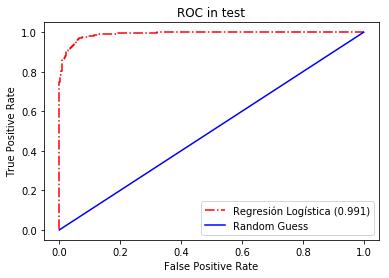

In [14]:
y_pred_proba = LR_model.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y_f, y_pred_proba[:,1])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Regresión Logística (%2.3f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

#### Random Forest

In [15]:
RF_model = RandomForestClassifier(n_estimators=10)
RF_model.fit(X, y_f)

y_pred = RF_model.predict(X)

accuracy_score(y_f, y_pred)
print("Accuracy de RF:", accuracy_score(y_f, y_pred))

Accuracy de RF: 0.997


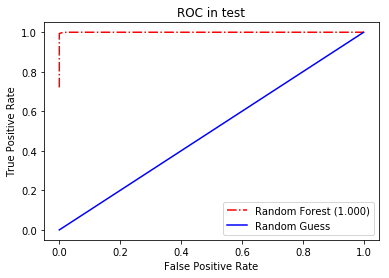

In [16]:

y_pred_proba = RF_model.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y_f, y_pred_proba[:,1])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Random Forest (%2.3f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

#### Acuraccy de nuesto modelo

In [17]:

y_pred = np.round(v2)
accuracy_score(y_f, y_pred)
print("Accuracy de Red Neuronal:", accuracy_score(y_f, y_pred))

Accuracy de Red Neuronal: 0.949


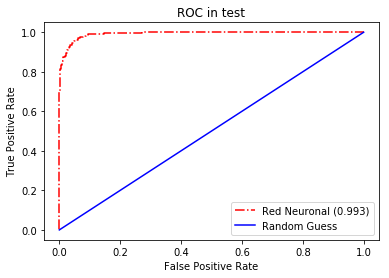

In [18]:
y_pred_proba = v2

fpr, tpr, thresholds = roc_curve(y_f, y_pred_proba)
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Red Neuronal (%2.3f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

Para ser un modelo bastante rudimentario no predice mal y el AUC es similar en los 3 modelos... pero seguramente exista _overfitting_